# Problem Statement 

The problem statement is to detect intrusions from a tcp dump.The data is provided in csv files so no feature extraction is involved 

In [2]:
# run only one time
import os 
os.chdir('/'.join(os.getcwd().split('/')[:-1]))

In [4]:
from data import fetch_data,feature_engineering

In [6]:
from data import fetch_data,feature_engineering
from models.model import Model
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score,confusion_matrix,roc_curve
from sklearn.externals import joblib
from Para_learn import paralearn
import pickle
import requests
from cross_val import k_fold_crossval
from sklearn import preprocessing
from aug import Sampling

%matplotlib inline 
root=os.getcwd()

In [7]:
x_train,y_train,x_test,y_test = fetch_data(root,remove_duplicates=True,binary=True)

Datasets loaded :)
The dimensions of the training dataset is (145583, 41)
The dimensions of test dataset is (311028, 41)
The taken to load data is 3.70 secs


In [3]:
x_train = feature_engineering(x_train,do_normalization=False)
x_test = feature_engineering(x_test,do_normalization=False)
print('Shape of training data after feature engineering is {}'.format(x_train.shape))
print ('Shape of test data after feature engineering is {}'.format(x_test.shape))

Shape of training data after feature engineering is (145583, 45)
Shape of test data after feature engineering is (311028, 45)


In [4]:
y_train.value_counts()

0    87814
1    57769
Name: label, dtype: int64

# Sampling 

In [ ]:
s = Sampling(x_train,y_train)

In [ ]:
data_for_modelling = s.Rand_Over_Samp(x_train,y_train)

# Modelling in progress

In [5]:

clf=Model(x_train,y_train)


In [6]:
#NAIVE BAYES
nb=clf.mnbayes(x_train,y_train)
predict_train_nb=nb.predict(x_train)
conf_matrix_nb=confusion_matrix(list(y_train),(predict_train_nb).round())
f1_score_train_nb=f1_score(list(y_train),(predict_train_nb).round())
fpr_nb,tpr_nb,thr_nb = roc_curve(list(y_train),(predict_train_nb))
auc_nb=np.trapz(tpr_nb,fpr_nb)
print (conf_matrix_nb)
print('The f1 score for NAIVE BAYES model on training data is {:.4f}'.format(f1_score_train_nb))  


[[77644 10170]
 [18535 39234]]
The f1 score for NAIVE BAYES model on training data is 0.7322


In [7]:
cross_val_score_nb=k_fold_crossval(nb,x_train,y_train,6)

f1 score for 1 iteration................. 0.8761
f1 score for 2 iteration................. 0.6582
f1 score for 3 iteration................. 0.6636
f1 score for 4 iteration................. 0.6346
f1 score for 5 iteration................. 0.6432
f1 score for 6 iteration................. 0.6427


In [8]:
#SVM 
svm=clf.svm(x_train,y_train)
predict_train_svm=svm.predict(x_train)
conf_matrix_svm=confusion_matrix(list(y_train),(predict_train_svm).round())
f1_score_train_svm=f1_score(list(y_train),(predict_train_svm).round())
fpr_svm,tpr_svm,thr_svm = roc_curve(list(y_train),(predict_train_svm))
auc_svm=np.trapz(tpr_svm,fpr_svm)


print (conf_matrix_svm)
print('The f1 score for SUPPORT VECTOR MACHINES model on training data is {:.4f}'.format(f1_score_train_svm))


[[82620  5194]
 [ 2067 55702]]
The f1 score for SUPPORT VECTOR MACHINES model on training data is 0.9388


In [9]:
cross_val_score_svm=k_fold_crossval(svm,x_train,y_train,6)

f1 score for 1 iteration................. 0.9462
f1 score for 2 iteration................. 0.9292
f1 score for 3 iteration................. 0.9365
f1 score for 4 iteration................. 0.9165
f1 score for 5 iteration................. 0.9728
f1 score for 6 iteration................. 0.9510


In [10]:
#XGBOOST 
xgb,x_dtrain,x_dtest=clf.xgboost(x_train,y_train,x_test,cv=True)
predict_train_xgb=xgb.predict(x_dtrain)
conf_matrix_xgb=confusion_matrix(list(y_train),(predict_train_xgb).round())
f1_score_train_xgb=f1_score(list(y_train),(predict_train_xgb).round())
fpr_xgb,tpr_xgb,thr_xgb = roc_curve(list(y_train),(predict_train_xgb))
auc_xgb=np.trapz(tpr_xgb,fpr_xgb)


print (conf_matrix_xgb)
print('The f1 score for XGBOOST model on training data is {:.4f}'.format(f1_score_train_xgb))


[0]	train-auc:0.994297+0.000266011	test-auc:0.994209+0.000426128
[1]	train-auc:0.999001+0.000106937	test-auc:0.998963+0.000269452
[2]	train-auc:0.999621+5.48576e-05	test-auc:0.999574+5.94421e-05
[3]	train-auc:0.999758+2.82744e-05	test-auc:0.99973+7.18955e-05
[4]	train-auc:0.999775+1.98937e-05	test-auc:0.999757+7.90048e-05
[5]	train-auc:0.999803+1.37055e-05	test-auc:0.999784+8.77897e-05
[6]	train-auc:0.999868+2.53014e-05	test-auc:0.999841+6.03503e-05
[7]	train-auc:0.99991+2.56094e-05	test-auc:0.999853+5.47262e-05
[8]	train-auc:0.999931+2.18486e-05	test-auc:0.999843+6.18547e-05
[9]	train-auc:0.999963+5.95315e-06	test-auc:0.999877+4.56526e-05
[[87783    31]
 [   71 57698]]
The f1 score for XGBOOST model on training data is 0.9991


In [11]:
#RANDOMFOREST 
rf=clf.randforest(x_train,y_train)
predict_train_rf=rf.predict(x_train)
conf_matrix_rf=confusion_matrix(list(y_train),(predict_train_rf).round())
f1_score_train_rf=f1_score(list(y_train),(predict_train_rf).round())
fpr_rf,tpr_rf,thr_rf = roc_curve(list(y_train),(predict_train_rf))
auc_rf=np.trapz(tpr_rf,fpr_rf)
print (conf_matrix_rf)
print('The f1 score for RANDOM FOREST model on training data is {:.4f}'.format(f1_score_train_rf))


[[87814     0]
 [   17 57752]]
The f1 score for RANDOM FOREST model on training data is 0.9999


In [12]:
# Cross validation to check whether the model is overfitting or not 
cross_val_score_rf=k_fold_crossval(rf,x_train,y_train,6)


f1 score for 1 iteration................. 0.9988
f1 score for 2 iteration................. 0.9993
f1 score for 3 iteration................. 0.9989
f1 score for 4 iteration................. 0.9996
f1 score for 5 iteration................. 0.9992
f1 score for 6 iteration................. 0.9990


# Model Selection 


After doing hyperparameter optimization for different models on the training data and computing a metric evaluating the generalization of a particular model,we can select which model will be our best bet for generalizing over to the unseen data 

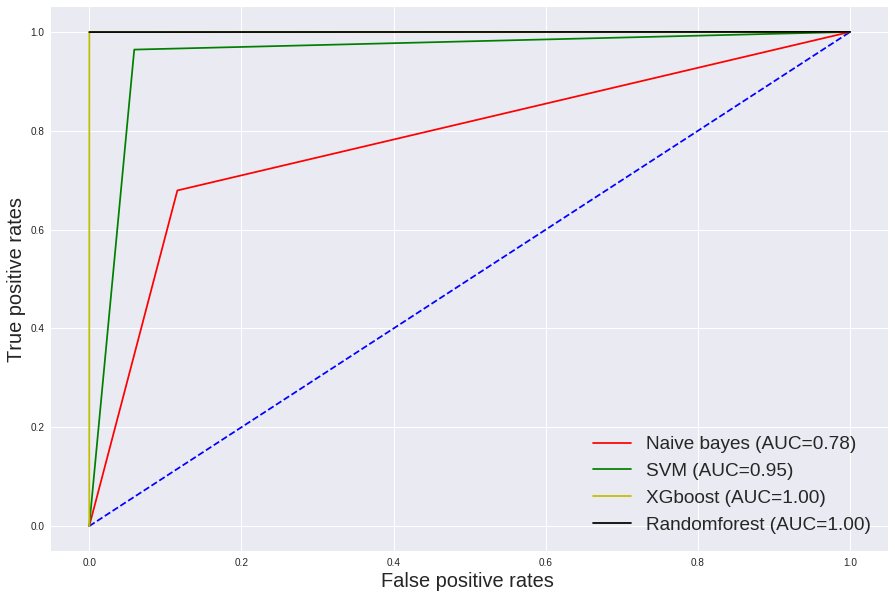

In [14]:
# ROC - AUC  Plots 
plt.figure(figsize=(15,10))
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr_nb,tpr_nb,'r',label='Naive bayes (AUC={:.2f})'.format(auc_nb))
plt.plot(fpr_svm,tpr_svm,'g',label = 'SVM (AUC={:.2f})'.format(auc_svm))
plt.plot(fpr_xgb,tpr_xgb,'y',label='XGboost (AUC={:.2f})'.format(auc_xgb))
plt.plot(fpr_rf,tpr_rf,'k',label='Randomforest (AUC={:.2f})'.format(auc_rf))
plt.xlabel('False positive rates ',size=20)
plt.ylabel('True positive rates',size=20)
plt.legend(loc='lower right',prop={'size':19})
plt.show()

# Multiclass Classification 


In [2]:
x_train,y_train,x_test,y_test=fetch_data(root,remove_duplicates=True,binary=False)

Datasets loaded :)
The dimensions of the training dataset is (145583, 41)
The dimensions of test dataset is (311028, 41)
The taken to load data is 5.07 secs


In [3]:
x_train=feature_engineering(x_train,do_normalization=False)
x_test=feature_engineering(x_test,do_normalization=False)

In [ ]:
s = Sampling(x_train,y_train)
data_for_modelling = s.Rand_Over_Samp(x_train,y_train)

In [4]:
m1=Model(x_train,y_train)

In [8]:
le=preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
c=m1.randforest(x_train,y_train)


In [9]:
y=c.predict(x_test[:100000])
y2=c.predict(x_test[100000:200000])
y3=c.predict(x_test[200000:])

y_pred=np.append(y,y2)   
del y,y2
y_pred=np.append(y_pred,y3)
del y3

y_pred=le.inverse_transform(y_pred)

# Hitting the API 

In [ ]:
#Random forest is the one. Lets save this model somewhere and hit the api to see what happens 
joblib.dump(rf,'random_forest.pkl')

In [ ]:
# Hitting the api 
root

In [ ]:
import pickle

In [ ]:
pickle.load(open('rf_test.pkl','rb'))

In [ ]:
pickle.dump(rf,open('rf_test.pkl','wb'),protocol=2)